In [1]:
!pip install tensorflow==2.17.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-09-18 14:26:53.462228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 14:26:53.463027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 14:26:53.466820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 14:26:53.479856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 14:26:53.500849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results    

In [5]:
def draw_landmark(image, results): 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1726662416.166757    4997 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1726662416.171136    5094 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1726662416.279631    5083 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662416.300512    5084 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662416.301716    5088 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662416.301716    5086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferen

In [8]:
#len(results.left_hand_landmarks.landmark)

mp_holistic.POSE_CONNECTIONS

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
draw_landmark(frame, results)

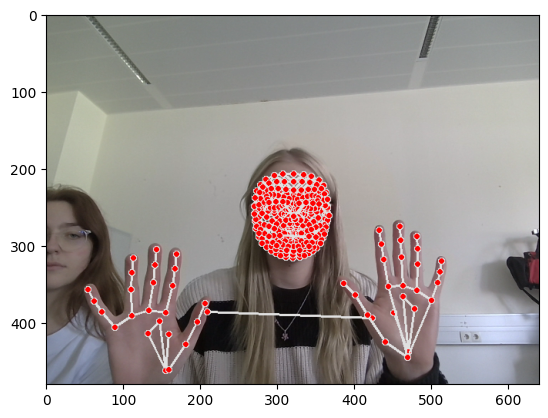

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
#len(results.left_hand_landmarks.landmark)

In [13]:
for res in results.pose_landmarks.landmark: 
   test = np.array([res.x, res.y, res.z, res.visibility])

In [14]:
test

array([3.58349532e-01, 2.58649206e+00, 1.14084721e-01, 1.89115992e-04])

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.50235128,  0.5468443 , -0.61109775,  0.99998158]),
 array([ 0.5270133 ,  0.50898349, -0.5609048 ,  0.99998009]),
 array([ 0.54213411,  0.51093024, -0.56063908,  0.99998063]),
 array([ 0.55450261,  0.51287347, -0.56000328,  0.99997938]),
 array([ 0.48067412,  0.50733715, -0.55426502,  0.99997008]),
 array([ 0.46583802,  0.50782716, -0.55343723,  0.99995923]),
 array([ 0.45304781,  0.50910884, -0.55328929,  0.99994546]),
 array([ 0.5742628 ,  0.54419911, -0.25752753,  0.99997997]),
 array([ 0.43824196,  0.53791767, -0.2216069 ,  0.99995524]),
 array([ 0.5340063 ,  0.60152411, -0.50596696,  0.99996853]),
 array([ 0.4743503 ,  0.59816468, -0.49490494,  0.9999575 ]),
 array([ 0.66129655,  0.82262236, -0.11079662,  0.99916357]),
 array([ 0.32731035,  0.80493528, -0.08592363,  0.99452835]),
 array([ 0.76698112,  1.16751242, -0.53749943,  0.80084819]),
 array([ 0.21981451,  1.17918837, -0.57648939,  0.63807845]),
 array([ 0.73538846,  0.91387182, -1.07521737,  0.98174381]),
 array([

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [18]:
res.y

2.5864920616149902

In [19]:
lh

array([ 7.32892454e-01,  9.28686500e-01,  2.51660822e-07,  6.87624991e-01,
        8.86392713e-01, -1.51348040e-02,  6.52622163e-01,  8.13230395e-01,
       -1.73312500e-02,  6.28047764e-01,  7.59604216e-01, -1.88490115e-02,
        6.03426814e-01,  7.27153361e-01, -1.91778615e-02,  6.94129527e-01,
        7.36472368e-01,  2.96902680e-03,  6.85313225e-01,  6.63794041e-01,
       -4.74642962e-03,  6.80020213e-01,  6.21144950e-01, -1.36336749e-02,
        6.76473916e-01,  5.85214853e-01, -2.07524858e-02,  7.23493814e-01,
        7.34215856e-01,  2.03712308e-03,  7.20467627e-01,  6.57506585e-01,
       -1.68452307e-03,  7.18775988e-01,  6.10640824e-01, -8.30343086e-03,
        7.17195451e-01,  5.73500991e-01, -1.37177082e-02,  7.52669334e-01,
        7.47525752e-01, -2.57288339e-03,  7.53854692e-01,  6.76930547e-01,
       -7.81375263e-03,  7.54007459e-01,  6.35142863e-01, -1.27717173e-02,
        7.52780974e-01,  6.00401938e-01, -1.71882845e-02,  7.81904399e-01,
        7.73047507e-01, -

In [20]:
pose

array([ 5.02351284e-01,  5.46844304e-01, -6.11097753e-01,  9.99981582e-01,
        5.27013302e-01,  5.08983493e-01, -5.60904801e-01,  9.99980092e-01,
        5.42134106e-01,  5.10930240e-01, -5.60639083e-01,  9.99980628e-01,
        5.54502606e-01,  5.12873471e-01, -5.60003281e-01,  9.99979377e-01,
        4.80674118e-01,  5.07337153e-01, -5.54265022e-01,  9.99970078e-01,
        4.65838015e-01,  5.07827163e-01, -5.53437233e-01,  9.99959230e-01,
        4.53047812e-01,  5.09108841e-01, -5.53289294e-01,  9.99945462e-01,
        5.74262798e-01,  5.44199109e-01, -2.57527530e-01,  9.99979973e-01,
        4.38241959e-01,  5.37917674e-01, -2.21606895e-01,  9.99955237e-01,
        5.34006298e-01,  6.01524115e-01, -5.05966961e-01,  9.99968529e-01,
        4.74350303e-01,  5.98164678e-01, -4.94904935e-01,  9.99957502e-01,
        6.61296546e-01,  8.22622359e-01, -1.10796615e-01,  9.99163568e-01,
        3.27310354e-01,  8.04935277e-01, -8.59236345e-02,  9.94528353e-01,
        7.66981125e-01,  

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
extract_keypoints(results)

array([ 0.50235128,  0.5468443 , -0.61109775, ...,  0.08540569,
        0.74512786, -0.05617305])

In [23]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['X', 'Y', 'Z'])
no_sequences = 30
#'A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H', 'I' ,'J', 'K', 'L', ,'M', 'N', 'O'  'P', 'Q', 'R', 'S', 'T', 'U','V', 'W', 'X'   
sequence_length = 30

In [24]:
#keypoints

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'X': 0, 'Y': 1, 'Z': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_train.shape

(85, 3)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Add dropout after LSTM layers
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
optimizer = Adam(learning_rate=0.001)  # Try a smaller learning rate if the model struggles
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.2623 - loss: 1.1089
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3464 - loss: 1.0999
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3013 - loss: 1.1130
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3953 - loss: 1.1027
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3347 - loss: 1.1094
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3816 - loss: 1.0907
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.3209 - loss: 1.0916
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4090 - loss: 1.0764
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3229 - loss: 1.0893
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3659 - loss: 1.0974
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4521 - loss: 1.0763
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accura

KeyboardInterrupt: 

In [50]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


In [52]:
actions[np.argmax(res[2])]

'X'

In [ ]:
#actions[np.argmax(y_test[2])]model.save('action.h5')

In [ ]:
#model.save('action.h5')

In [ ]:
#del model

In [ ]:
#model.load_weights('action.h5')

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [55]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

In [ ]:
yhat

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[45, 11],
        [ 6, 23]],

       [[49,  7],
        [ 0, 29]],

       [[58,  0],
        [12, 15]]])

In [57]:
accuracy_score(ytrue, yhat)

0.788235294117647

In [58]:
threshold = 0.8

In [61]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1726662625.350617    4997 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1726662625.353286   10782 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
W0000 00:00:1726662625.454828   10769 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662625.475689   10770 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662625.477020   10769 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726662625.477468   10779 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
np.expand_dims(X_test[0], axis=0)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))